# [Big Data 분석 기초] 4 탐색적 분석 - 추론통계 - 220805

---

### 통계적 추론

#### 정규성 검정 (Normality Test)

In [156]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro

ds_camshaft = pd.read_csv('/home/piai/minji/dataset/camshaft.csv', encoding = 'euc-kr')
print(ds_camshaft.shape)
ds_camshaft.head()

(100, 3)


,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [64]:
stat, pval = shapiro(ds_camshaft['Supp1'])

print("H0 : 정규성을 만족한다.")
print("H1 : 정규성을 만족하지 않는다.")
print("")
print("----------- Shapiro-Wilk 정규성 검정 결과 -----------")
print("검정통계량 : %.3f, 유의확률 :%.3f" % (stat, pval))

H0 : 정규성을 만족한다.
H1 : 정규성을 만족하지 않는다.

----------- Shapiro-Wilk 정규성 검정 결과 -----------
검정통계량 : 0.979, 유의확률 :0.107


Shapiro-Wilk 정규성 검정 결과, 검정통계량 0.979에 대한 유의확률 0.107 > 0.05이므로 유의수준 5% 하에서 귀무가설을 채택한다. 즉, 

#### Python을 이용한 정규성 검정 실습 (265쪽)

In [124]:
dat = pd.read_csv('/home/piai/minji/dataset/2sample_t_test.csv', encoding = 'euc-kr')

print(dat.shape)
dat

(20, 4)


,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1
5,71.5,72.7,71.5,1
6,74.5,66.9,74.5,1
7,77.5,70.2,77.5,1
8,76.4,74.4,76.4,1
9,77.7,70.1,77.7,1


In [117]:
# Mat_A에 대한 정규성 검정

stat_A, pval_A = shapiro(dat['Mat_A'])

print("H0 : 정규성을 만족한다.")
print("H1 : 정규성을 만족하지 않는다.")
print("")
print("----------- Shapiro-Wilk 정규성 검정 결과 -----------")
print("검정통계량 %.5f에 대한 유의확률 %.5f > 0.05이므로 H0 채택" % (stat_A, pval_A))

H0 : 정규성을 만족한다.
H1 : 정규성을 만족하지 않는다.

----------- Shapiro-Wilk 정규성 검정 결과 -----------
검정통계량 nan에 대한 유의확률 1.00000 > 0.05이므로 H0 채택


In [116]:
# Mat_B에 대한 정규성 검정

stat_B, pval_B = shapiro(dat['Mat_B'])

print("H0 : 정규성을 만족한다.")
print("H1 : 정규성을 만족하지 않는다.")
print("")
print("----------- Shapiro-Wilk 정규성 검정 결과 -----------")
print("검정통계량 %.5f에 대한 유의확률 %.5f > 0.05이므로 H0 채택" % (stat_B, pval_B))

H0 : 정규성을 만족한다.
H1 : 정규성을 만족하지 않는다.

----------- Shapiro-Wilk 정규성 검정 결과 -----------
검정통계량 nan에 대한 유의확률 1.00000 > 0.05이므로 H0 채택


#### 모평균 구간 추정

In [32]:
np.mean(df)

Sample    3.695
dtype: float64

In [41]:
df = pd.DataFrame({"Sample" : [3.6, 2.9, 2.8, 2.6, 3.4, 3.2, 2.2, 2.6, 2.6, 2.4,
                              2.4, 2.6, 3.4, 2.4, 2.1, 2.6, 3.0, 2.4, 2.7, 2.4,
                              2.6, 2.9, 2.9, 2.0, 2.7, 2.2, 2.8, 2.7, 1.8, 2.5,
                              3.0, 3.2, 2.8, 2.6, 3.2, 3.1, 2.9, 2.7, 2.7, 2.2]})

print(df.shape)
df.head()

(40, 1)


,Sample
0,3.6
1,2.9
2,2.8
3,2.6
4,3.4


In [55]:
sigma = 0.397

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = sigma/np.sqrt(df.shape[0]))
print("신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([2.57], [2.82])


신품종 배추의 평균무게에 대한 95% 신뢰구간은 (2.57, 2.82)이다.

##### Python을 이용한 구간추정 실습 (268쪽)

In [56]:
dat = pd.DataFrame({"weight" : [18, 18, 20, 21, 20, 23, 19, 18, 17, 21,
                               22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})

print(dat.shape)
dat.head()

(20, 1)


,weight
0,18
1,18
2,20
3,21
4,20


In [57]:
sigma = 3.8

lower, upper = stats.norm.interval(0.95, loc = np.mean(dat), scale = sigma / np.sqrt(dat.shape[0]))
print("신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([17.83], [21.17])


/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


신품종 배추의 평균 무게에 대한 95% 신뢰구간은 (2.03, 5.36)이다.

In [52]:
dat = pd.DataFrame({'Sample' : [54.1, 53.3, 56.1, 55.7, 54.0, 54.1, 54.5, 57.1, 55.2, 53.8,
                               54.1, 54.1, 56.1, 55.0, 55.9, 56.0, 54.9, 54.3, 53.9, 55.0]})

print(dat.shape)
dat.head()

(20, 1)


,Sample
0,54.1
1,53.3
2,56.1
3,55.7
4,54.0


In [53]:
sigma = 54.860

lower, upper = stats.norm.interval(0.95, loc = np.mean(dat), scale = sigma / np.sqrt(dat.shape[0]))
print("신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([-21.35], [26.74])


/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


**294쪽**

In [93]:
df = pd.DataFrame({'sample' :[74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})

print(df.shape)
df.head()

(10, 1)


,sample
0,74.5
1,81.2
2,73.8
3,82.0
4,76.3


<AxesSubplot:>

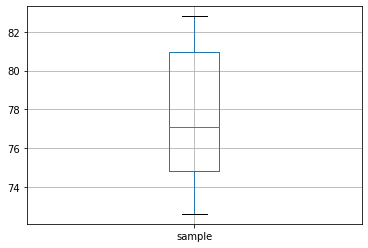

In [94]:
df.boxplot(['sample'])

In [95]:
statistic, p = stats.shapiro(df['sample'])
print("statistic = {}, p-value = {}".format(statistic, p))

statistic = 0.9331598281860352, p-value = 0.4796823561191559


##### Python을 이용한 가설검정 실습 (299쪽)

In [105]:
df = pd.DataFrame({'A' : [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                  'B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

print(df.shape)
df.head()

(8, 2)


,A,B
0,1.883,1.435
1,1.715,1.572
2,1.799,1.486
3,1.768,1.511
4,1.711,1.457


In [111]:
# 정규성 검정

statistic1, p1 = stats.shapiro(df['A'])
print("----------- A에 대한 정규성 검정 -----------")
print("statistic = {}, p-value = {}".format(statistic1, p1))
print("")

----------- A에 대한 정규성 검정 -----------
statistic = 0.8425756096839905, p-value = 0.08004552870988846



검정통계량 0.843에 대한 유의확률 0.08 > 0.05이므로 유의수준 5% 하에서 귀무가설을 채택한다. 따라서, A공급자의 제품 두께 데이터는 정규성을 만족한다고 할 수 있다.

In [112]:
# 정규성 검정

statistic2, p2 = stats.shapiro(df['B'])
print("----------- B에 대한 정규성 검정 -----------")
print("statistic = {}, p-value = {}".format(statistic2, p2))

----------- B에 대한 정규성 검정 -----------
statistic = 0.7734811902046204, p-value = 0.014793740585446358


검정통계량 0.774에 대한 유의확률 0.01 < 0.05이므로 유의수준 5% 하에서 귀무가설을 기각한다. 따라서, B공급자의 제품 두께 데이터는 정규성을 만족한다고 할 수 없다.

In [99]:
# 등분산성 검정

from scipy.stats import bartlett

statistic, p = stats.bartlett(df['A'], df['B'])
print("----------- A와 B에 대한 등분산성 검정 -----------")
print("statistic = {}, p-value = {}".format(statistic, p))

----------- A와 B에 대한 등분산성 검정 -----------
statistic = 0.42411436523132123, p-value = 0.5148911629500761


검정통계량 0.424에 대한 유의확률 0.514 > 0.05이므로 유의수준 5% 하에서 귀무가설을 채택한다. 즉, 두 집단의 데이터는 등분산성을 만족한다.

In [104]:
# 대응표본 t-검정

statistic, p = stats.ttest_ind(df['A'], df['B'])
print("----------- 2-Sample t-test -----------")
print("t : {}".format(statistic.round(5)))
print("p : {}".format(p.round(5)))

----------- 2-Sample t-test -----------
t : 1.69954
p : 0.11132


- H0 : A공급자와 B공급자 간 모평균에 차이가 없다.
- H1 : A공급자와 B공급자 간 모평균에 차이가 있다.


검정통계량 1.699에 대한 유의확률 0.11 >0.05이므로 귀무가설을 채택한다. 즉, 두 공급자의 제품 간 모평균은 차이가 없다고 볼 수 있다.

##### Python을 이용한 가설검정 실습 (302쪽)

In [123]:
before = pd.DataFrame({'before' : [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
after = pd.DataFrame({'after' : [710, 580, 787, 712, 750, 600, 782, 670, 790, 780]})

In [126]:
# 대응표본 t-검정

t, p = stats.ttest_rel(before, after)

print("------- Paired t-test -------")
print("t: {}".format(t.round(3)))
print("p: {}".format(p.round(3)))

------- Paired t-test -------
t: [-1.904]
p: [0.089]


- H0 : 학원 가기 전후 간 회사원들의 성적 평균에 차이가 없다.
- H1 : 학원 가기 전후 간 회사원들의 성적 평균에 차이가 있다.

검정통계량 -1.904에 대한 유의확률 0.089 > 0.05이므로 귀무가설을 채택한다. 따라서, 학원 가기 전후 간 회사원들의 성적에는 차이가 없다는 것을 확인할 수 있다.

#### 카이제곱검정

In [128]:
from scipy.stats import chi2_contingency

df = pd.DataFrame({'Work_1' : [270, 228, 277],
                 'Work_2' : [260, 285, 284],
                 'Work_3' : [236, 225, 231],
                 'Work_4' : [234, 262, 208]})

print(df.shape)
df.head()

(3, 4)


,Work_1,Work_2,Work_3,Work_4
0,270,260,236,234
1,228,285,225,262
2,277,284,231,208


In [129]:
chi, pval, dof, expected = stats.chi2_contingency(df)

print("------- Chi-square test -------")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

------- Chi-square test -------
chisq : 13.366
p : 0.038
degree of freedom : 6
expected value : 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


#### 분산분석(ANOVA)

In [141]:
df = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771],
                   'B': [721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                   'C': [621, 915, 888, 721, 894, 834, 841, 912, 845, 889]})

print(df.shape)
df.head()

(10, 3)


,A,B,C
0,892,721,621
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894


<AxesSubplot:>

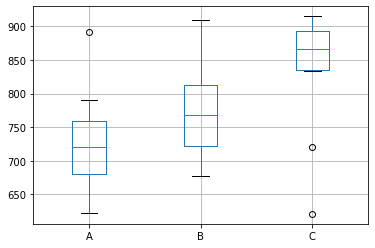

In [142]:
df.boxplot(['A', 'B', 'C'])

In [143]:
# 정규성 검정

statistic1, p1 = stats.shapiro(df['A'])
print("A : statistic = {}, p-value = {}".format(statistic1, p1))

statistic2, p2 = stats.shapiro(df['B'])
print("B : statistic = {}, p-value = {}".format(statistic2, p2))

statistic3, p3 = stats.shapiro(df['C'])
print("C : statistic = {}, p-value = {}".format(statistic3, p3))

A : statistic = 0.9293239712715149, p-value = 0.44127610325813293
B : statistic = 0.9242647886276245, p-value = 0.39390110969543457
C : statistic = 0.7892211675643921, p-value = 0.010720876976847649


- A : 유의확률 0.44 > 0.05이므로 정규성을 만족한다고 볼 수 있다.
- B : 유의확률 0.39 > 0.05이므로 정규성을 만족한다고 볼 수 있다.
- C : 유의확률 0.01 < 0.05이므로 정규성을 만족한다고 볼 수 없다. 

C그룹의 데이터는 정규성 가정을 만족하지 않으므로 bartlett 검정이 아닌 levene 검정을 시행한다.

In [145]:
# 등분산성 검정

stats.levene(df['A'], df['B'], df['C'])

LeveneResult(statistic=0.13014245089698043, pvalue=0.8785177601959513)

유의확률 0.878 > 0.05이므로 귀무가설을 채택한다. 따라서, 등분산성을 가정할 수 잇다.

In [147]:
# ANOVA

f_result = stats.f_oneway(df['A'], df['B'], df['C'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("------- One-way ANOVA -------")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

------- One-way ANOVA -------
F 통계량 : 4.263
p-value : 0.025


- H0 : 세 그룹 간 토익 점수의 차이가 없다.
- H1 : 세 그룹 간 토익 점수의 차이가 있다.

검정통계량 4.263에 대한 유의확률 0.025 < 0.05이므로 귀무가설을 기각한다. 따라서, 세 그룹 간 토익 점수에는 차이가 있다고 할 수 있다.

**상관분석**

In [151]:
df1 = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8]
df2 = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119]

In [155]:
corr, pval = stats.pearsonr(df1, df2)

print("------- Correlation Analysis -------")
print("corr : {0:0.3f}".format(corr))
print("p-value : {0:0.3f}".format(pval))

------- Correlation Analysis -------
corr : 0.989
p-value : 0.000


- H0 : 부품수리시간과 부품 수 간의 상관관계 = 0
- H1 : 부품수리시간과 부품 수 간의 상관관계 != 0

유의확률 0.000 < 0.05이므로 귀무가설을 기각한다. 따라서, 부품수리시간과 부품 수 간의 상관성이 있으며, 약 0.989로 강한 양의 상관성을 가진다고 볼 수 있다.